In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [116]:
# loading the data
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [3]:
train.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

In [4]:
train.shape, test.shape

((9527, 23), (5045, 22))

In [5]:
# Print data types for each variable
train.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [6]:
#printing first five rows of the dataset
train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [27]:
train['Business_Sourced'].value_counts()

0    6260
1    3267
Name: Business_Sourced, dtype: int64

In [28]:
# Normalize can be set to True to print proportions instead of number 
train['Business_Sourced'].value_counts(normalize=True)

0    0.65708
1    0.34292
Name: Business_Sourced, dtype: float64

<AxesSubplot:>

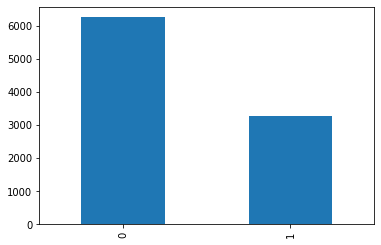

In [9]:
# plotting the bar plot of frequencies
train['Business_Sourced'].value_counts().plot.bar()

In [10]:
def age_from_date(date):
    year = date.split('/')[-1]
    month = date.split('/')[0]
    birth = int(year) + float(month)/12
    ref = 2009
    age = ref - birth
    return age

In [117]:
dict_date = {}
dataset = [train, test]
columns = ['Application_Receipt_Date', 'Applicant_BirthDate', 'Manager_DOJ', 'Manager_DoB']
for data in dataset:
    for column in columns:
        data[column] = data[column].fillna(0)
        for date in data[column]:
            if date!=0:
                dict_date[date] = age_from_date(date)
        data.replace({column: dict_date}, inplace = True)

<AxesSubplot:xlabel='Application_Receipt_Date', ylabel='Density'>

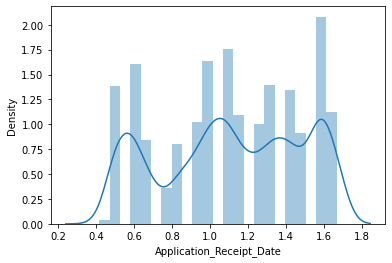

In [30]:
sns.distplot(train["Application_Receipt_Date"])

<AxesSubplot:xlabel='Applicant_BirthDate', ylabel='Density'>

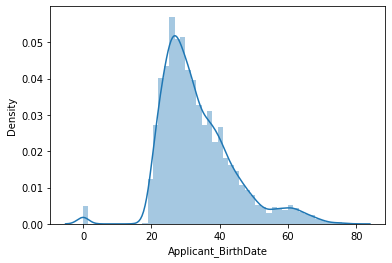

In [31]:
sns.distplot(train["Applicant_BirthDate"])

<AxesSubplot:xlabel='Manager_DOJ', ylabel='Density'>

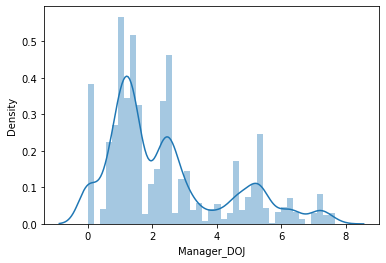

In [32]:
sns.distplot(train["Manager_DOJ"])

<AxesSubplot:xlabel='Manager_DoB', ylabel='Density'>

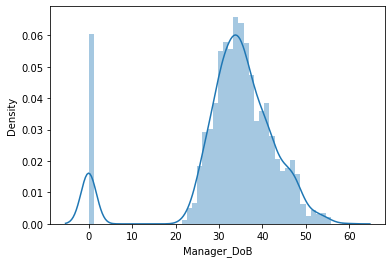

In [33]:
sns.distplot(train["Manager_DoB"])

In [17]:
def random_gen(string):
    data = [train, test]
    for dataset in data:
        mean = train[string].mean()
        std = test[string].std()
        is_null = dataset[string].isnull().sum()
        # compute random numbers between the mean, std and is_null
        rand_string = np.random.randint(mean - std, mean + std, size = is_null)
        # fill NaN values in Age column with random values generated
        string_slice = dataset[string].copy()
        string_slice[np.isnan(string_slice)] = rand_string
        dataset[string] = string_slice
        dataset[string] = train[string].astype(int)

<AxesSubplot:>

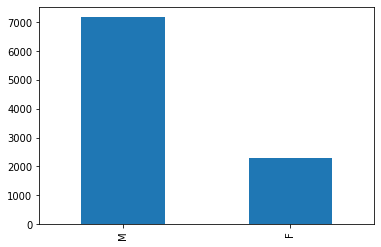

In [34]:
train['Applicant_Gender'].value_counts().plot.bar()

<AxesSubplot:>

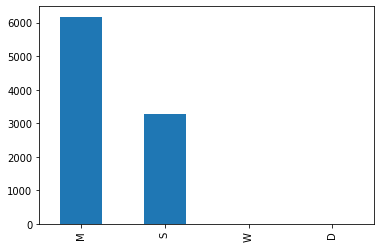

In [35]:
train['Applicant_Marital_Status'].value_counts().plot.bar()

<AxesSubplot:>

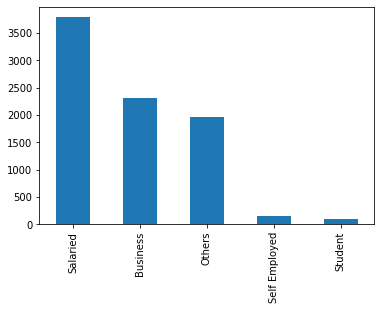

In [36]:
train['Applicant_Occupation'].value_counts().plot.bar()

<AxesSubplot:>

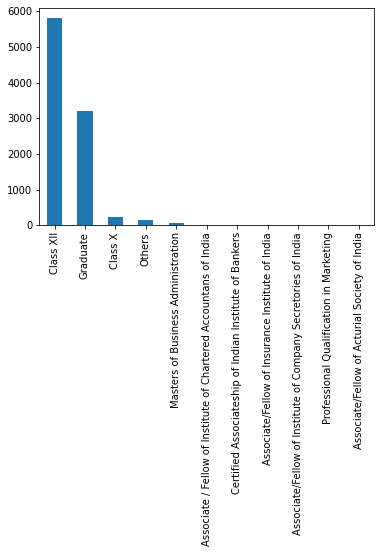

In [37]:
train['Applicant_Qualification'].value_counts().plot.bar()

<AxesSubplot:>

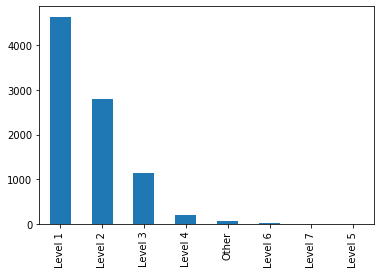

In [38]:
train['Manager_Joining_Designation'].value_counts().plot.bar()

<AxesSubplot:>

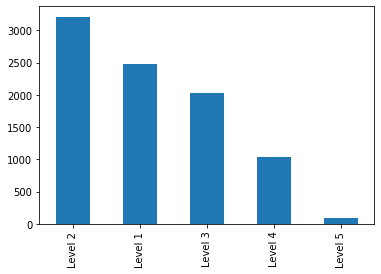

In [39]:
train['Manager_Current_Designation'].value_counts().plot.bar()

<AxesSubplot:>

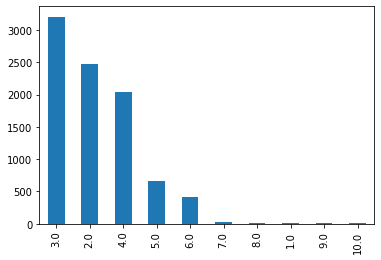

In [40]:
train['Manager_Grade'].value_counts().plot.bar()

<AxesSubplot:>

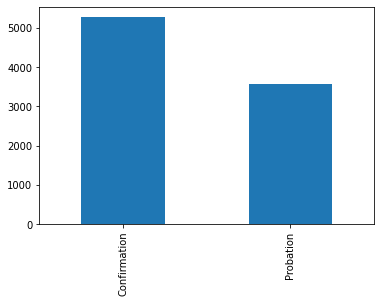

In [41]:
train['Manager_Status'].value_counts().plot.bar()

<AxesSubplot:>

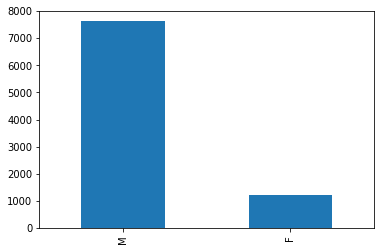

In [42]:
train['Manager_Gender'].value_counts().plot.bar()

Business_Sourced     0  1
Applicant_City_PIN       
110001.0             1  1
110003.0             2  1
110004.0             2  0
110005.0             2  0
110006.0             3  1
...                 .. ..
853204.0            10  1
854101.0             0  1
856127.0             0  1
888620.0             0  1
995657.0             1  0

[2979 rows x 2 columns]


Text(0, 0.5, 'Percentage')

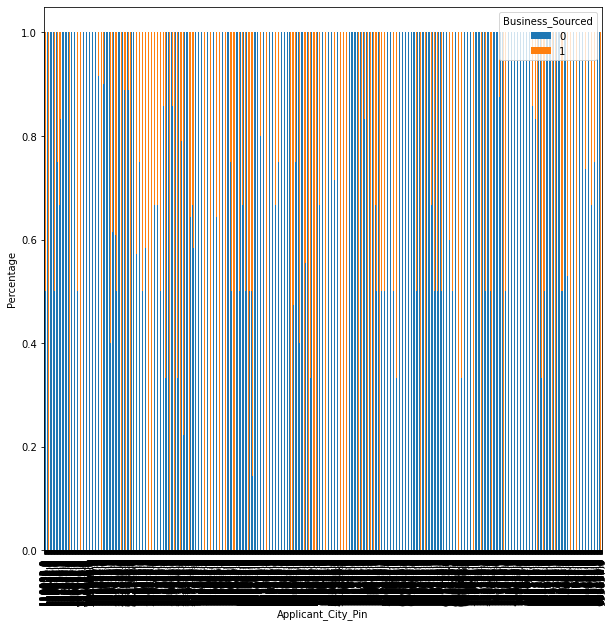

In [44]:
print(pd.crosstab(train['Applicant_City_PIN'],train['Business_Sourced']))

app=pd.crosstab(train['Applicant_City_PIN'],train['Business_Sourced'])
app.div(app.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('Applicant_City_Pin')
plt.ylabel('Percentage')

<AxesSubplot:>

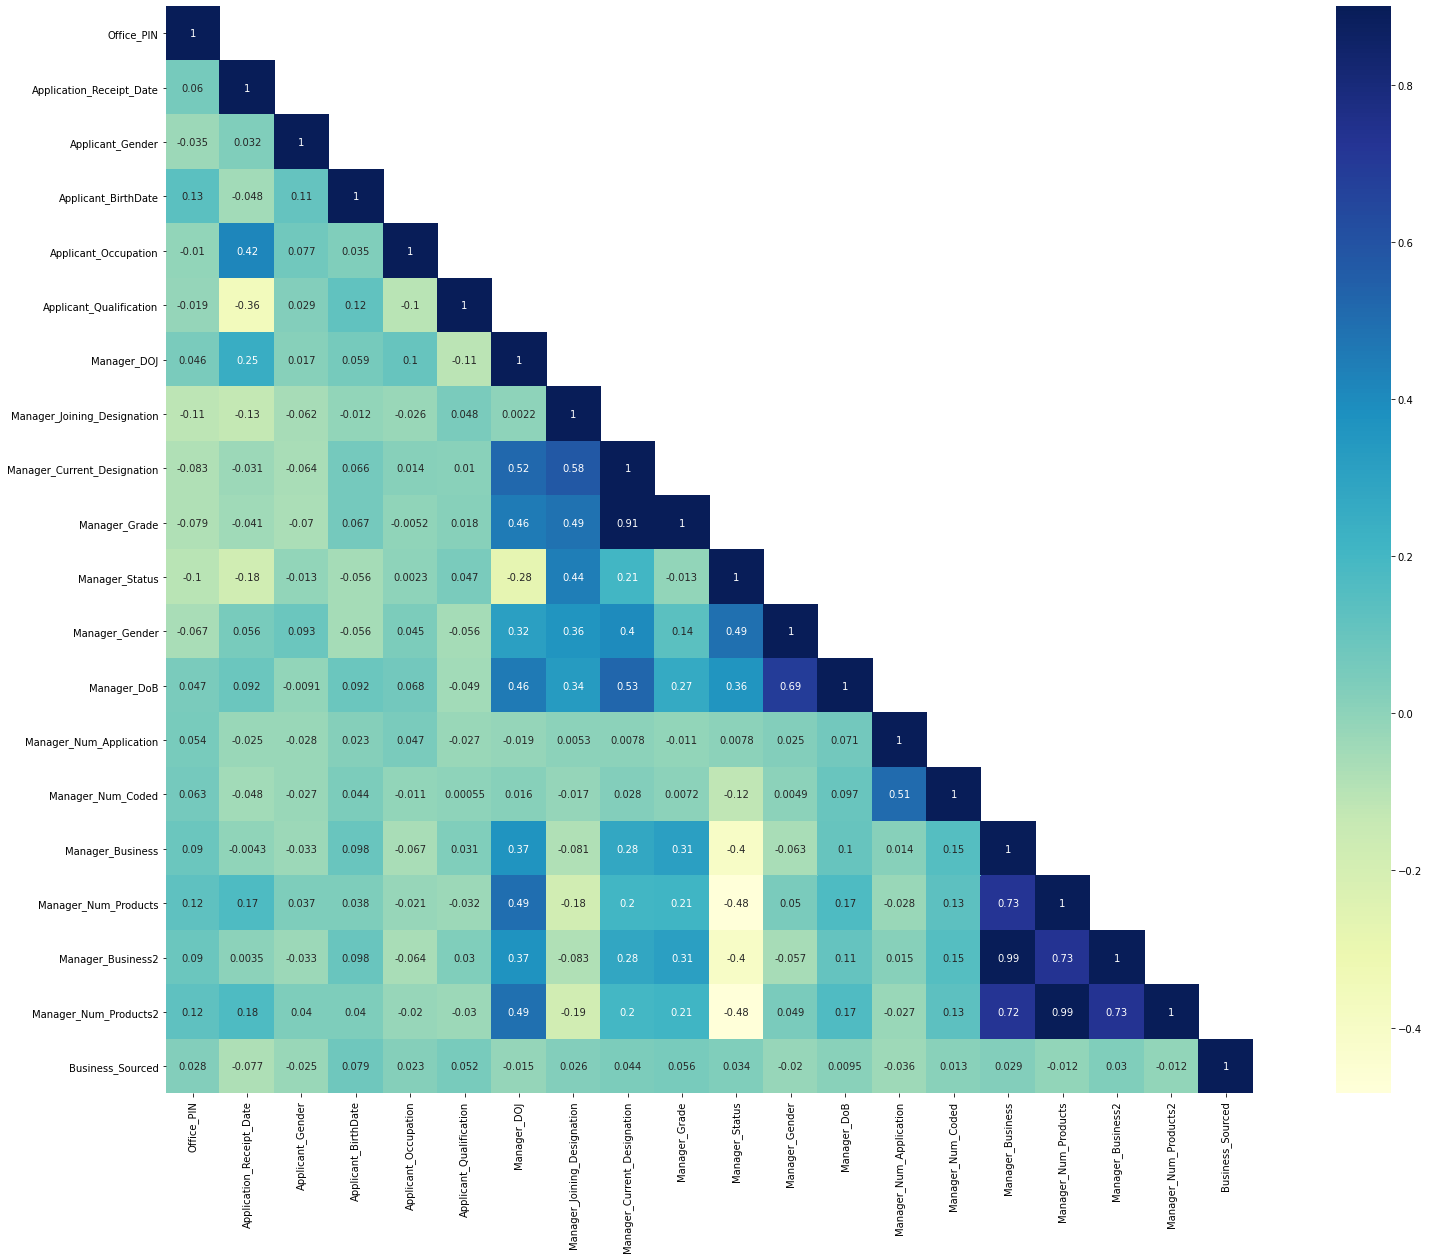

In [136]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,20)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [47]:
train.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate               0
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                       0
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                       0
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [118]:
#Convert Applicant Gender
dict_gender = {'M': 1, 'F':0}
train.replace({'Applicant_Gender': dict_gender}, inplace = True)

train['Applicant_Gender'] = train['Applicant_Gender'].fillna(-1)

test.replace({'Applicant_Gender': dict_gender}, inplace = True)

test['Applicant_Gender'] = test['Applicant_Gender'].fillna(-1)

In [119]:
train['Applicant_Marital_Status'] = train['Applicant_Marital_Status'].fillna('M')

In [120]:
#Convert Applicant Occupation
dict_occupation = {'Salaried': 5, 'Business':4, 'Others':3, 'Self Employed':2, 'Student':1}
train.replace({'Applicant_Occupation': dict_occupation}, inplace = True)

train['Applicant_Occupation'] = train['Applicant_Occupation'].fillna(0)

In [121]:
test.replace({'Applicant_Occupation': dict_occupation}, inplace = True)

test['Applicant_Occupation'] = test['Applicant_Occupation'].fillna(0)

In [122]:
random_gen('Manager_Num_Products2')
random_gen('Manager_Business2')
random_gen('Manager_Num_Products')
random_gen('Manager_Business')
random_gen('Manager_Num_Coded')
random_gen('Manager_Grade')
random_gen('Manager_Num_Application')

In [56]:
train.isnull().sum()

ID                               0
Office_PIN                       0
Application_Receipt_Date         0
Applicant_City_PIN              97
Applicant_Gender                 0
Applicant_BirthDate              0
Applicant_Marital_Status         0
Applicant_Occupation             0
Applicant_Qualification         86
Manager_DOJ                      0
Manager_Joining_Designation    683
Manager_Current_Designation    683
Manager_Grade                    0
Manager_Status                 683
Manager_Gender                 683
Manager_DoB                      0
Manager_Num_Application          0
Manager_Num_Coded                0
Manager_Business                 0
Manager_Num_Products             0
Manager_Business2                0
Manager_Num_Products2            0
Business_Sourced                 0
dtype: int64

In [124]:
#Convert Manager Joining Designation
dict_join_des = {'Level 1': 1, 'Level 2':2, 'Level 3':3, 'Level 4':4, 'Level 5':5, 'Level 6':6, 'Level 7':7, 'Other':8}
train.replace({'Manager_Joining_Designation': dict_join_des}, inplace = True)

train['Manager_Joining_Designation'] = train['Manager_Joining_Designation'].fillna(0)

test.replace({'Manager_Joining_Designation': dict_join_des}, inplace = True)

test['Manager_Joining_Designation'] = test['Manager_Joining_Designation'].fillna(0)

In [125]:
#Convert Manager Current Designation
dict_cur_des = {'Level 1': 1, 'Level 2':2, 'Level 3':3, 'Level 4':4, 'Level 5':5}
train.replace({'Manager_Current_Designation': dict_cur_des}, inplace = True)

train['Manager_Current_Designation'] = train['Manager_Current_Designation'].fillna(0)

test.replace({'Manager_Current_Designation': dict_cur_des}, inplace = True)

test['Manager_Current_Designation'] = test['Manager_Current_Designation'].fillna(0)

In [126]:
#Convert Manager Gender
dict_gender = {'M': 1, 'F':0}
train.replace({'Manager_Gender': dict_gender}, inplace = True)

train['Manager_Gender'] = train['Manager_Gender'].fillna(-1)

test.replace({'Manager_Gender': dict_gender}, inplace = True)

test['Manager_Gender'] = test['Manager_Gender'].fillna(-1)

In [127]:
#Convert Manager Status
dict_status = {'Probation': 1, 'Confirmation':0}
train.replace({'Manager_Status': dict_status}, inplace = True)

train['Manager_Status'] = train['Manager_Status'].fillna(-1)

test.replace({'Manager_Status': dict_status}, inplace = True)

test['Manager_Status'] = test['Manager_Status'].fillna(-1)

In [112]:
test.isnull().sum()

ID                              0
Office_PIN                      0
Application_Receipt_Date        0
Applicant_City_PIN             34
Applicant_Gender                0
Applicant_BirthDate             0
Applicant_Marital_Status        0
Applicant_Occupation            0
Applicant_Qualification         0
Manager_DOJ                     0
Manager_Joining_Designation     0
Manager_Current_Designation     0
Manager_Grade                   0
Manager_Status                  0
Manager_Gender                  0
Manager_DoB                     0
Manager_Num_Application         0
Manager_Num_Coded               0
Manager_Business                0
Manager_Num_Products            0
Manager_Business2               0
Manager_Num_Products2           0
dtype: int64

In [128]:
#Convert Applicant Qualification
dict_qualification = {'Class XII': 1, 'Graduate':2, 'Class X':3, 'Others':4, 'Masters of Business Administration':5,
                      'Associate / Fellow of Institute of Chartered Accountans of India':6, 
                     'Associate/Fellow of Insurance Institute of India':7, 'Professional Qualification in Marketing':8,
                     'Associate/Fellow of Institute of Company Secretories of India':9, 'Associate/Fellow of Acturial Society of India':10,
                     'Certified Associateship of Indian Institute of Bankers':11, 'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India':12}
train.replace({'Applicant_Qualification': dict_qualification}, inplace = True)

train['Applicant_Qualification'] = train['Applicant_Qualification'].fillna(0)

test.replace({'Applicant_Qualification': dict_qualification}, inplace = True)

test['Applicant_Qualification'] = test['Applicant_Qualification'].fillna(0)

In [129]:
train['Applicant_City_PIN'].value_counts()

202001.0    103
492001.0     75
305001.0     64
452001.0     55
476001.0     51
           ... 
804451.0      1
171302.0      1
175006.0      1
813222.0      1
281204.0      1
Name: Applicant_City_PIN, Length: 2979, dtype: int64

In [131]:
train['Applicant_City_PIN'] = test['Applicant_City_PIN'].fillna(470001.0, inplace=True)

In [132]:
test['Applicant_City_PIN'] = test['Applicant_City_PIN'].fillna(121002.0, inplace=True)

In [130]:
test['Applicant_City_PIN'].value_counts()

492001.0    55
431001.0    44
121004.0    40
121001.0    37
452001.0    35
            ..
241501.0     1
171103.0     1
462039.0     1
332027.0     1
412108.0     1
Name: Applicant_City_PIN, Length: 2064, dtype: int64

In [85]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from collections import Counter
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.svm import SVC
import plotly.express as px

In [133]:
# Getting Features
features = ['Manager_Num_Products2','Manager_Num_Products','Manager_Business','Manager_Business2','Manager_Num_Coded', 'Manager_Num_Application','Manager_Grade','Manager_Status','Manager_Current_Designation','Applicant_Occupation',
           'Application_Receipt_Date', 'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status', 'Applicant_Qualification',
           'Manager_DOJ', 'Manager_Joining_Designation', 'Manager_Gender', 'Manager_DoB', 'Office_PIN', 'Applicant_City_PIN']
x = pd.get_dummies(train[features])

# Predicting value
y = train['Business_Sourced']
y.shape, x.shape

((9527,), (9527, 23))

In [134]:
xtest = pd.get_dummies(test[features])
xtest

,Manager_Num_Products2,Manager_Num_Products,Manager_Business,Manager_Business2,Manager_Num_Coded,Manager_Num_Application,Manager_Grade,Manager_Status,Manager_Current_Designation,Applicant_Occupation,...,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Gender,Manager_DoB,Office_PIN,Applicant_Marital_Status_D,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W
0,28,28,335249,335249,1,2,3,1.0,1.0,5.0,...,2.0,0.583333,1.0,0.0,30.166667,284001,0,0,1,0
1,28,28,335249,335249,1,2,3,1.0,1.0,5.0,...,2.0,0.500000,1.0,1.0,37.750000,800001,0,1,0,0
2,24,24,357184,357184,0,0,2,-1.0,0.0,0.0,...,2.0,0.000000,0.0,-1.0,0.000000,800001,0,0,1,0
3,22,22,318356,318356,0,0,4,-1.0,0.0,5.0,...,2.0,0.000000,0.0,-1.0,0.000000,800001,0,0,1,0
4,17,17,230402,230402,1,2,2,0.0,2.0,0.0,...,5.0,1.000000,2.0,1.0,31.500000,533101,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,9,9,175273,175273,1,1,4,1.0,2.0,3.0,...,2.0,0.000000,2.0,1.0,30.583333,691008,0,1,0,0
5041,10,10,225710,225710,0,1,3,1.0,2.0,3.0,...,2.0,0.000000,2.0,1.0,30.583333,691008,0,1,0,0
5042,0,0,0,0,0,3,3,1.0,2.0,4.0,...,1.0,0.000000,2.0,1.0,30.583333,691008,0,1,0,0
5043,8,8,177204,177204,1,1,2,1.0,2.0,0.0,...,2.0,0.250000,2.0,1.0,30.500000,208001,0,1,0,0


In [106]:
def preprocessing(data,features,labels,test_size = 0.2,random_state =42, tune = 'n',cv_folds = 5):
    
    print('Checking if labels or features are categorical! [*]\n')
    cat_features=[i for i in features.columns if features.dtypes[i]=='object']
    if len(cat_features) >= 1 :
        index = []
        for i in range(0,len(cat_features)):
            index.append(features.columns.get_loc(cat_features[i]))
        print('Features are Categorical\n')
        ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), index)], remainder='passthrough')
        print('Encoding Features [*]\n')
        features = np.array(ct.fit_transform(features))
        print('Encoding Features Done [',u'\u2713',']\n')
    if labels.dtype == 'O':
        le = LabelEncoder()
        print('Labels are Categorical [*] \n')
        print('Encoding Labels \n')
        labels = le.fit_transform(labels)
        print('Encoding Labels Done [',u'\u2713',']\n')
    else:
        print('Features and labels are not categorical [',u'\u2713',']\n')
        
    ## SMOTE ---------------------------------------------------------------------
    print('Applying SMOTE [*]\n')
    
    sm=SMOTE(k_neighbors=4)
    features,labels=sm.fit_resample(features,labels)
    print('SMOTE Done [',u'\u2713',']\n')
    
    ## Splitting ---------------------------------------------------------------------
    print('Splitting Data into Train and Validation Sets [*]\n')
    
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size= test_size, random_state= random_state)
    print('Splitting Done [',u'\u2713',']\n')
    
    ## Scaling ---------------------------------------------------------------------
    print('Scaling Training and Test Sets [*]\n')
    
    sc = StandardScaler()
    X_train = sc.fit_transform(x_train)
    X_val = sc.transform(x_test)
    print('Scaling Done [',u'\u2713',']\n')
    
    print('Training All Basic Classifiers on Training Set [*] \n')
    
    parameters_svm= [
    {'kernel': ['rbf'], 'gamma': [0.1, 0.5, 0.9, 1],
        'C': np.logspace(-4, 4, 5)},
    ]
    parameters_lin = [{
    'penalty': ['l1', 'l2', ],
    'solver': ['newton-cg', 'liblinear', ],
    'C': np.logspace(-4, 4, 5),
    }]
    parameters_knn = [{
    'n_neighbors': list(range(0, 11)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'kd_tree', 'brute'],
    }]
    parameters_dt = [{
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [4,  6,  8,  10,  12,  20,  40, 70],

    }]
    parameters_rfc = [{
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 300, 500, 750, 1000],
    'max_features': [2, 3],
    }]
    parameters_xgb = [{
    'max_depth': [4,  6,  8,  10],
    'learning_rate': [0.3, 0.1],
    }]
    parameters_lgbm =  {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'boosting_type' : ['gbdt', 'dart'],
    'objective' : ['binary'],
    }
    paramters_pac = {
        'C': np.logspace(-4, 4, 20)},
    
    
    param_nb={}
    parameters_ada={
            'learning_rate': [0.005, 0.01],
            'n_estimators': [8,16,24],
    }
    paramters_sgdc = [{
    'penalty': ['l2', 'l1', 'elasticnet'],
    'loss': ['hinge', 'log'],
    'alpha':np.logspace(-4, 4, 20),
    }]
    models =[("LR", LogisticRegression(), parameters_lin),("SVC", SVC(),parameters_svm),('KNN',KNeighborsClassifier(),parameters_knn),
    ("DTC", DecisionTreeClassifier(),parameters_dt),("GNB", GaussianNB(), param_nb),("SGDC", SGDClassifier(), paramters_sgdc),('RF',RandomForestClassifier(),parameters_rfc),
    ('ADA',AdaBoostClassifier(),parameters_ada),('XGB',GradientBoostingClassifier(),parameters_xgb),('LGBN', LGBMClassifier(),parameters_lgbm),
    ('PAC',PassiveAggressiveClassifier(),paramters_pac)]

    results = []
    names = []
    finalResults = []
    accres = []

    for name,model, param in models:
        
        model.fit(x_train, y_train)
        model_results = model.predict(x_test)
        accuracy = accuracy_score(y_test, model_results)
        print('Validation Accuracy is :',accuracy)
        print('Applying K-Fold Cross validation on Model {}[*]'.format(name))
        accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=cv_folds, scoring='accuracy')
        print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
        acc = accuracies.mean()*100
        print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) 
        results.append(acc)
        names.append(name)
        accres.append((name,acc))
        if tune == 'y' and not name == 'GNB':
            print('Applying Grid Search Cross validation for model {} []\n'.format(name))
            cv_params = param
            grid_search = GridSearchCV(
            estimator=model,
            param_grid=cv_params,
            scoring='accuracy',
            cv=cv_folds,
            n_jobs=-1,
            verbose=4,
                )
            grid_search.fit(X_train, y_train)
            best_accuracy = grid_search.best_score_
            best_parameters = grid_search.best_params_
            print("Best Accuracy for model {}: {:.2f} %".format(name,best_accuracy*100))
            print("Best Parameters: for model {}".format(name), best_parameters)
            print('Applying Grid Search Cross validation Done[',u'\u2713',']\n')
            
        print('Training Compeleted Showing Predictions [',u'\u2713','] \n')
    accres.sort(key=lambda k:k[1],reverse=True)
    print("\n The Accuracy of the Models Are:\n ")
    tab = pd.DataFrame(accres)
    print(tab)
    sns.barplot(x=tab[1], y=tab[0], palette='mako');
    plt.show()
    print("\n\nModel With Highest Accuracy is: \n",accres[0],'\n\n')

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training All Basic Classifiers on Training Set [*] 

Validation Accuracy is : 0.4836261980830671
Applying K-Fold Cross validation on Model LR[*]
Accuracy: 50.52 %
Standard Deviation: 0.11 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.5547124600638977
Applying K-Fold Cross validation on Model SVC[*]
Accuracy: 53.82 %
Standard Deviation: 0.94 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.6261980830670927
Applying K-Fold Cross validation on Model KNN[*]
Accuracy: 62.71 %
Standard Deviation: 1.19 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.6733226837060703
Applying K-Fold Cross validation on Model DTC[*]
Accuracy: 66.08 %
Standard Dev

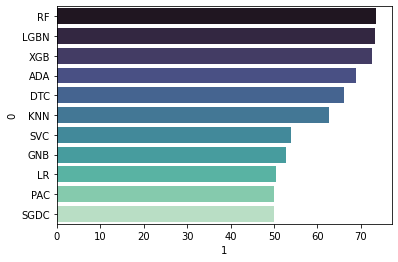



Model With Highest Accuracy is: 
 ('RF', 73.40257577705299) 




In [137]:
preprocessing(train,x,y)

In [123]:
test['Applicant_Marital_Status'] = test['Applicant_Marital_Status'].fillna('M')

In [138]:
model = RandomForestClassifier()
model.fit(x,y)
y_pred = model.predict(pd.get_dummies(xtest))

In [140]:
output = pd.DataFrame({'ID': test.ID, 'Business_Sourced': y_pred.astype(int)})
output.to_csv('final_submission11.csv', index=False)

In [141]:
output['Business_Sourced'].value_counts()

0    4260
1     785
Name: Business_Sourced, dtype: int64